# Value of Quarterbacks in Fantasy Football Overtime

This notebook looks at the value of quarterbacks in fantasy football over time. The data was taken from [fantasy-csv-data](https://github.com/bendominguez0111/fantasy-csv-data). Data is available from 1970 to 2021. Points are likely calculated using Half PPR. More details about the socring format can be found [here](https://www.fantasypros.com/scoring-settings).


## Download Data

Run the below code cell to download the data to a _data/ff_ folder.


In [1]:
import os
import pandas as pd
import seaborn as sns

# Download the data
START_YEAR = 1970
END_YEAR = 2021

In [75]:
# Create a data folder if it does not exist
os.makedirs('./data/ff', exist_ok=True)

for year in range(START_YEAR, END_YEAR+1):

    # The 2020 dataset does not have an index, so do read the CSV expecting an index
    if year == 2020:
        df = pd.read_csv(
            f'https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/{year}.csv')
    else:
        df = pd.read_csv(
            f'https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/{year}.csv', index_col=0)
    df.to_csv(f'./data/ff/{year}.csv', index=False)

In [2]:
# List the columns in the data

df = pd.read_csv('./data/ff/2021.csv')
print(df.columns)

Index(['Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Tgt', 'Rec', 'PassingYds',
       'PassingTD', 'PassingAtt', 'RushingYds', 'RushingTD', 'RushingAtt',
       'ReceivingYds', 'ReceivingTD', 'FantasyPoints', 'Int', 'Fumbles',
       'FumblesLost'],
      dtype='object')


In [3]:
# Number of quarterbacks, running backs, wide receivers

print(df['Pos'].value_counts())

Pos
WR    227
RB    168
TE    118
QB     83
Name: count, dtype: int64


In [4]:
# Show the top 12 quarterbacks

df[df['Pos'] == 'QB'].sort_values('FantasyPoints', ascending=False)[
    ['Player', 'FantasyPoints']].head(12)

,Player,FantasyPoints
3,Josh Allen,403.0
5,Justin Herbert*,381.0
6,Tom Brady*,375.0
12,Patrick Mahomes*,362.0
17,Aaron Rodgers*+,332.0
19,Matthew Stafford,330.0
22,Dak Prescott,321.0
28,Joe Burrow,314.0
30,Jalen Hurts,312.0
40,Kirk Cousins*,300.0


In [5]:
# Show the top 12 running backs

df[df['Pos'] == 'RB'].sort_values('FantasyPoints', ascending=False)[
    ['Player', 'FantasyPoints']].head(12)

,Player,FantasyPoints
0,Jonathan Taylor*+,333.0
4,Austin Ekeler,274.0
10,Joe Mixon*,246.0
13,Najee Harris*,227.0
15,James Conner*,221.0
21,Ezekiel Elliott,205.0
23,Nick Chubb*,195.0
27,Damien Harris,192.0
31,Alvin Kamara*,188.0
33,Leonard Fournette,187.0


In [6]:
# Show the top 12 wide receivers

df[df['Pos'] == 'WR'].sort_values('FantasyPoints', ascending=False)[
    ['Player', 'FantasyPoints']].head(12)

,Player,FantasyPoints
1,Cooper Kupp*+,295.0
2,Deebo Samuel*+,262.0
8,Ja'Marr Chase*,224.0
9,Justin Jefferson*,222.0
11,Davante Adams*+,221.0
16,Mike Evans*,189.0
18,Tyreek Hill*,186.0
20,Stefon Diggs*,183.0
24,Mike Williams,171.0
25,D.K. Metcalf,169.0


In [7]:
# For each year, extract the top 12 performing quarterbacks, running backs, and wide receivers
# Put the results in a dataframe for each position

df_qb = pd.DataFrame(['QB' for i in range(12)], columns=['Pos'])
df_rb = pd.DataFrame(['RB' for i in range(12)], columns=['Pos'])
df_wr = pd.DataFrame(['WR' for i in range(12)], columns=['Pos'])

for year in range(START_YEAR, END_YEAR+1):
    df = pd.read_csv(f'./data/ff/{year}.csv')

    qb = df[df['Pos'] == 'QB'].sort_values('FantasyPoints', ascending=False)[
        'FantasyPoints'].head(12)
    df_qb[f'{year}'] = qb.values

    rb = df[df['Pos'] == 'RB'].sort_values('FantasyPoints', ascending=False)[
        'FantasyPoints'].head(12)
    df_rb[f'{year}'] = rb.values

    wr = df[df['Pos'] == 'WR'].sort_values('FantasyPoints', ascending=False)[
        'FantasyPoints'].head(12)
    df_wr[f'{year}'] = wr.values

In [8]:
# Convert the dataframes from wide table to long table and stack

df_qb = df_qb.melt(id_vars='Pos', var_name='Year', value_name='FantasyPoints')
df_rb = df_rb.melt(id_vars='Pos', var_name='Year', value_name='FantasyPoints')
df_wr = df_wr.melt(id_vars='Pos', var_name='Year', value_name='FantasyPoints')

df_total = pd.concat([df_qb, df_rb, df_wr], axis=0)

/tmp/ipykernel_108806/672425779.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


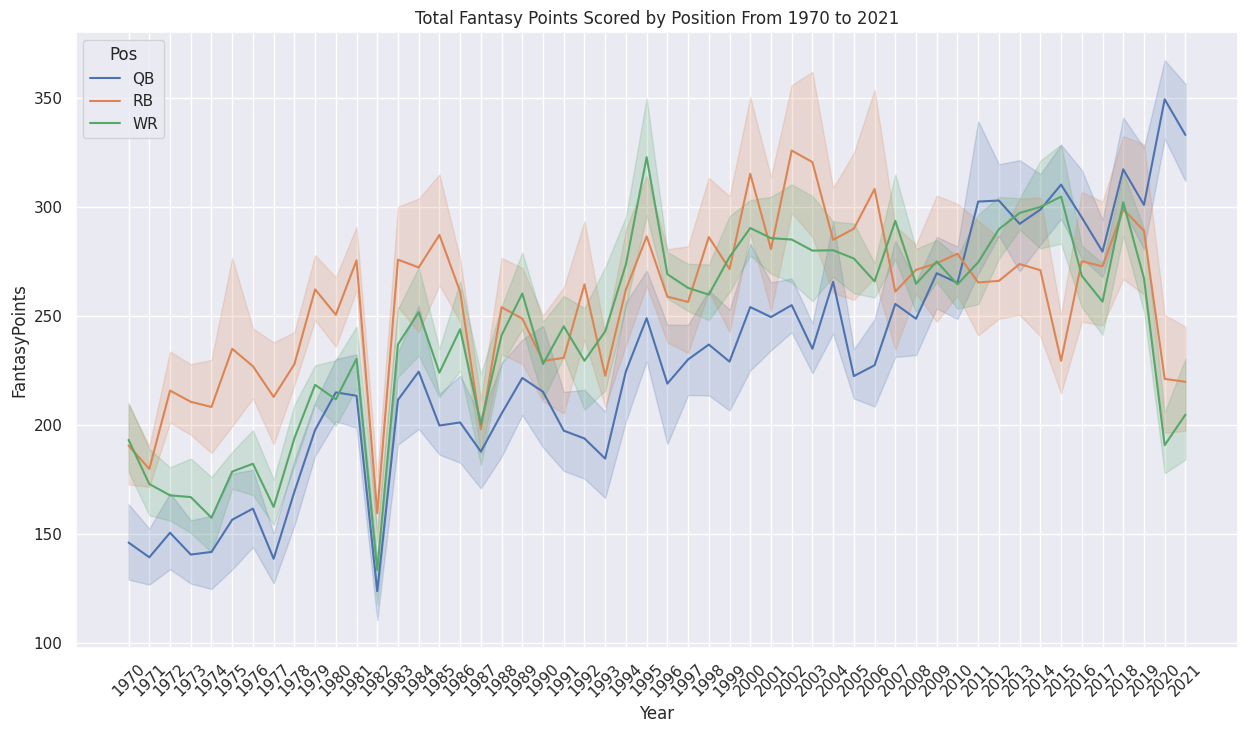

In [15]:
# Plot the total points scored by each position per year
sns.set(font_scale=0.75)

# Set figure size
sns.set(rc={'figure.figsize': (15, 8)})

ax = sns.lineplot(data=df_total, x='Year', y='FantasyPoints', hue='Pos')
ax.set_title(
    f'Total Fantasy Points Scored by Position From {START_YEAR} to {END_YEAR}')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Looking at the data, there is a sharp decrease in the number of points scored just for 1982. After a brief look on [Wikipedia](https://en.wikipedia.org/wiki/1982_NFL_season), it seems that there was a player-strike that reduced the total number of games played from the usual 16 to 9.

Looking into the number of games player per season further, the following years have a different number of games played than 16.

- 1982: 9 games
- 1987: 15 games
- 2021: 17 games

Data is collected again ignoring data from those years.


In [16]:
# For each year, extract the top 12 performing quarterbacks, running backs, and wide receivers
# Ignore the years 1982, 1987, and 2021

IGNORE_YEARS = [1982, 1987, 2021]

df_qb = pd.DataFrame(['QB' for i in range(12)], columns=['Pos'])
df_rb = pd.DataFrame(['RB' for i in range(12)], columns=['Pos'])
df_wr = pd.DataFrame(['WR' for i in range(12)], columns=['Pos'])

for year in range(START_YEAR, END_YEAR+1):

    if year in IGNORE_YEARS:
        continue

    df = pd.read_csv(f'./data/ff/{year}.csv')

    qb = df[df['Pos'] == 'QB'].sort_values('FantasyPoints', ascending=False)[
        'FantasyPoints'].head(12)
    df_qb[f'{year}'] = qb.values

    rb = df[df['Pos'] == 'RB'].sort_values('FantasyPoints', ascending=False)[
        'FantasyPoints'].head(12)
    df_rb[f'{year}'] = rb.values

    wr = df[df['Pos'] == 'WR'].sort_values('FantasyPoints', ascending=False)[
        'FantasyPoints'].head(12)
    df_wr[f'{year}'] = wr.values

In [17]:
# Convert the dataframes from wide table to long table and stack

df_qb = df_qb.melt(id_vars='Pos', var_name='Year', value_name='FantasyPoints')
df_rb = df_rb.melt(id_vars='Pos', var_name='Year', value_name='FantasyPoints')
df_wr = df_wr.melt(id_vars='Pos', var_name='Year', value_name='FantasyPoints')

df_total = pd.concat([df_qb, df_rb, df_wr], axis=0)

/tmp/ipykernel_108806/2915067159.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


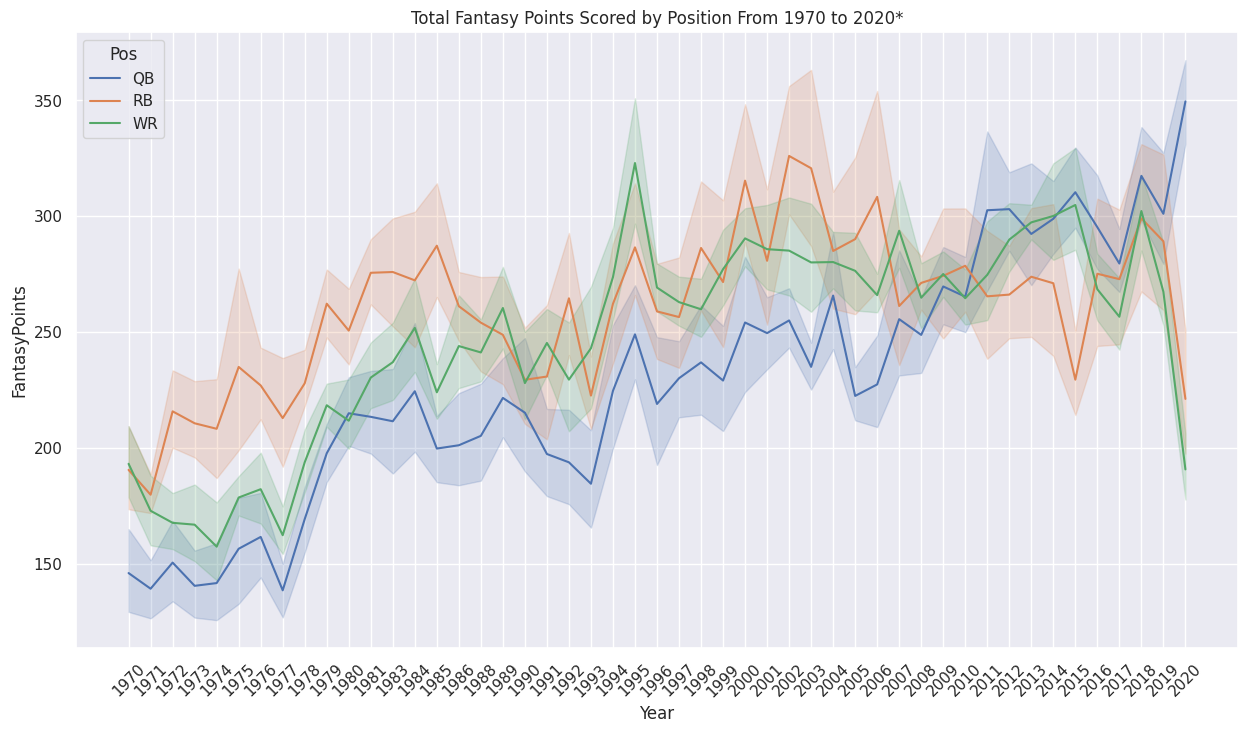

In [18]:
# Plot the total points scored by each position per year
ax = sns.lineplot(data=df_total, x='Year', y='FantasyPoints', hue='Pos')
ax.set_title(
    f'Total Fantasy Points Scored by Position From {START_YEAR} to 2020*')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [19]:
df_agg = df_total.pivot_table(
    index='Year', columns='Pos', values='FantasyPoints', aggfunc='mean')
df_agg.head()

Pos,QB,RB,WR
Year,,,
1970,146.016667,190.533333,193.166667
1971,139.263333,179.825000,172.891667
1972,150.535000,215.803333,167.700000
1973,140.513333,210.648333,166.900000
1974,141.700000,208.271667,157.411667


Text(0.5, 1.0, 'Average Fantasy Points Scored by Position From 1970 to 2020*')

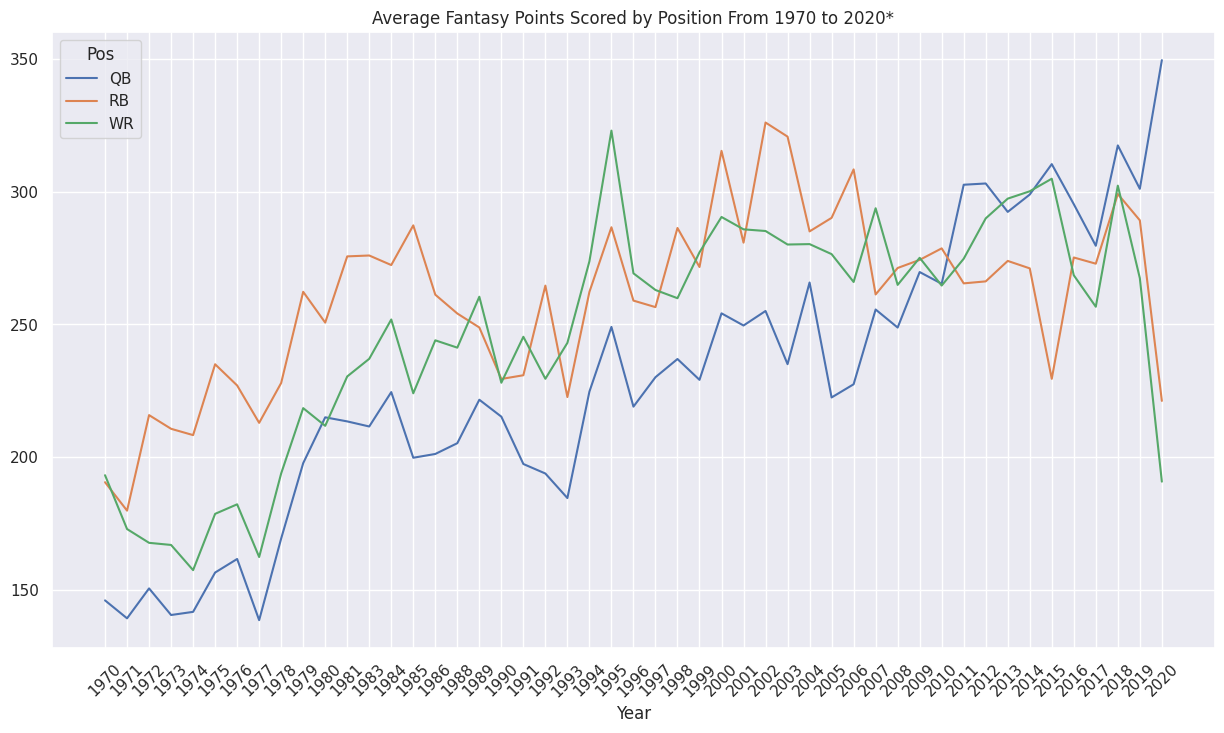

In [20]:
ax = df_agg.plot()
ax.set_xticks(range(len(df_agg)))
ax.set_xticklabels(df_agg.index, rotation=45)
ax.set_title(f'Average Fantasy Points Scored by Position From {START_YEAR} to 2020*')

In [23]:
# Compare the average points scored by each position per year

df_agg['WR:QB'] = df_agg['WR'] / df_agg['QB']
df_agg['RB:QB'] = df_agg['RB'] / df_agg['QB']
df_agg['QB:QB'] = df_agg['QB'] / df_agg['QB']

Text(0.5, 1.0, 'Value of QB Compared to Other Positions From 1970 to 2020*')

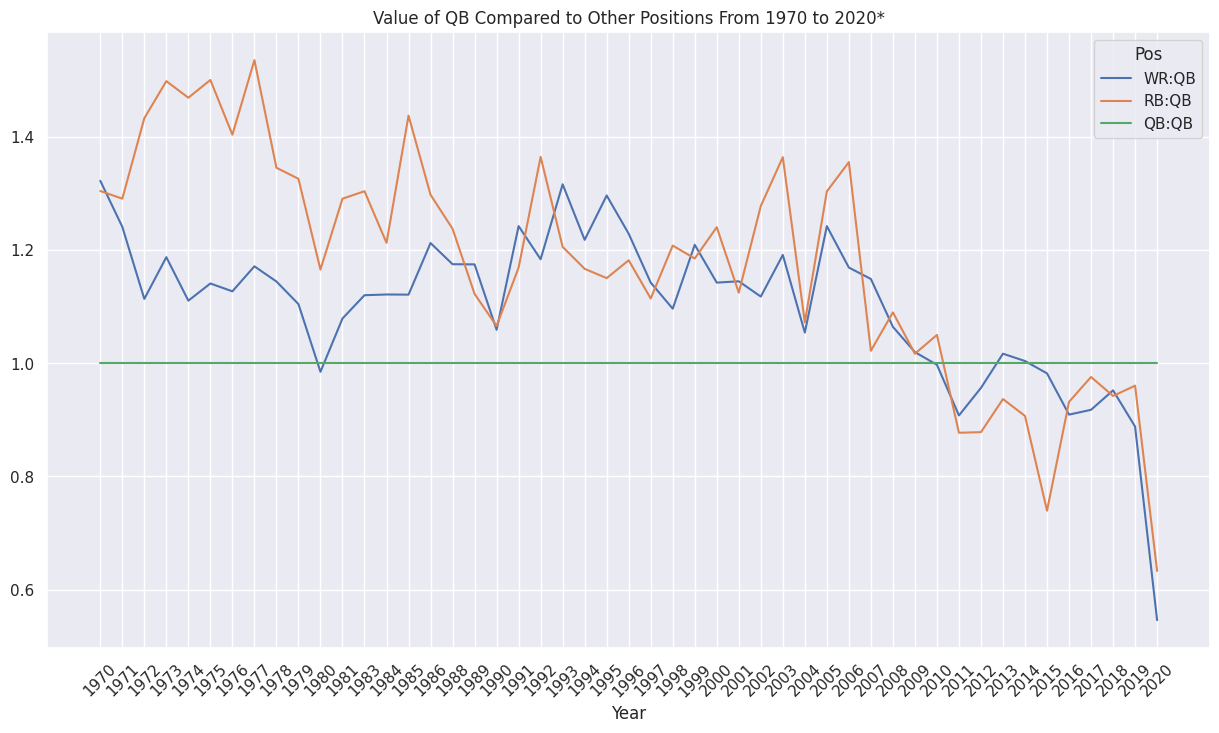

In [24]:
ax = df_agg[['WR:QB', 'RB:QB', 'QB:QB']].plot()
ax.set_xticks(range(len(df_agg)))
ax.set_xticklabels(df_agg.index, rotation=45)
ax.set_title(f'Value of QB Compared to Other Positions From {START_YEAR} to 2020*')

# Conclusion

It does make sense that it is becoming more and more valuable to take a running / mobile quarterback in an early round. It also is becoming a 'quarterbacks' / 'offensive' game which people say is driven by fans wanting more 35-37 matches rather than low scoring defensive battles. There are some odd artifacts in the number of fantasy points received by both running backs and wide receivers in 2020 and 2021. This needs to be looked into further.